rough mayorga

In [1]:
import math
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from datetime import datetime

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.preprocessing import PolynomialFeatures
import sklearn.preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.feature_selection import SelectKBest, f_regression, RFE

In [2]:
## Trusty Modules

from Acquire import get_texas_data
from Prepare import prepare_tex, create_features, split_data

# Acquire

In [3]:
df = get_texas_data()

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144738 entries, 0 to 144737
Data columns (total 21 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   AGY                      144738 non-null  int64  
 1   NAME                     144738 non-null  object 
 2   LASTNAME                 144738 non-null  object 
 3   FIRSTNAME                144738 non-null  object 
 4   MI                       144738 non-null  object 
 5   JOBCLASS                 144738 non-null  object 
 6   JC TITLE                 144738 non-null  object 
 7   RACE                     144738 non-null  object 
 8   SEX                      144738 non-null  object 
 9   EMPTYPE                  144738 non-null  object 
 10  HIREDT                   144738 non-null  object 
 11  RATE                     144738 non-null  float64
 12  HRSWKD                   144738 non-null  float64
 13  MONTHLY                  144738 non-null  float64
 14  ANNU

# Prepare

In [5]:
df = prepare_tex(df)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144730 entries, 0 to 144737
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   agency_id       144730 non-null  int64         
 1   agency          144730 non-null  object        
 2   lastname        144730 non-null  object        
 3   firstname       144730 non-null  object        
 4   title           144730 non-null  object        
 5   race            144730 non-null  object        
 6   sex             144730 non-null  object        
 7   emptype         144730 non-null  object        
 8   hire_date       144730 non-null  datetime64[ns]
 9   hours_worked    144730 non-null  float64       
 10  monthly_salary  144730 non-null  float64       
 11  annual_salary   144730 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(7)
memory usage: 14.4+ MB


In [7]:
df.head()

,agency_id,agency,lastname,firstname,title,race,sex,emptype,hire_date,hours_worked,monthly_salary,annual_salary
0,101,SENATE,GILLIAM,STACEY,LEG. OFFICIAL/ADMINISTRATOR,WHITE,FEMALE,URP - UNCLASSIFIED REGULAR PART-TIME,2013-07-01,20.0,8100.0,97200.0
1,104,LEGISLATIVE BUDGET BOARD,GILLIAM,STACEY,COMMITTEE DIRECTOR,WHITE,FEMALE,URP - UNCLASSIFIED REGULAR PART-TIME,2017-11-01,20.0,7000.0,84000.0
2,101,SENATE,NELSON,DAVID,LEG. OFFICIAL/ADMINISTRATOR,WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,1998-12-01,20.0,9500.0,114000.0
3,104,LEGISLATIVE BUDGET BOARD,NELSON,DAVID,SENIOR BUDGET ADVISOR,WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,2017-11-01,20.0,8000.0,96000.0
4,101,SENATE,ROCHA,MARIE,LEG. SERVICE/MAINTENANCE,HISPANIC,FEMALE,URF - UNCLASSIFIED REGULAR FULL-TIME,2003-05-01,41.0,3365.4,40384.8


# Explore

In [8]:
sample_df = df.sample(10000)

In [9]:
sample_df.columns

Index(['agency_id', 'agency', 'lastname', 'firstname', 'title', 'race', 'sex',
       'emptype', 'hire_date', 'hours_worked', 'monthly_salary',
       'annual_salary'],
      dtype='object')

(array([64647.,     0., 39554.,     0.,  4419.,     0., 33963.,     0.,
         1453.,   694.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <BarContainer object of 10 artists>)

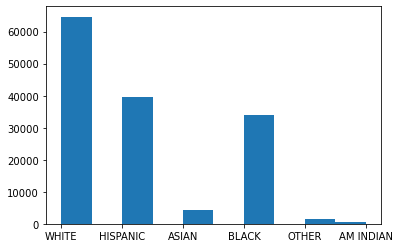

In [10]:
plt.hist(df.race)

In [11]:
df.columns

Index(['agency_id', 'agency', 'lastname', 'firstname', 'title', 'race', 'sex',
       'emptype', 'hire_date', 'hours_worked', 'monthly_salary',
       'annual_salary'],
      dtype='object')

In [12]:
df.race.value_counts()

WHITE        64647
HISPANIC     39554
BLACK        33963
ASIAN         4419
OTHER         1453
AM INDIAN      694
Name: race, dtype: int64

In [13]:
label_encoder = LabelEncoder() ## creating my label encoder

## creating a race column that is incoded for machine readable formate
df['race_encoded'] = label_encoder.fit_transform(df['race'])

<AxesSubplot:>

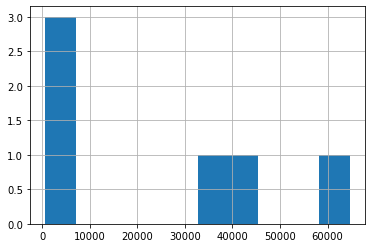

In [14]:
df.race.value_counts().hist()

In [15]:
df.race_encoded.value_counts()

5    64647
3    39554
2    33963
1     4419
4     1453
0      694
Name: race_encoded, dtype: int64

In [16]:
df.columns

Index(['agency_id', 'agency', 'lastname', 'firstname', 'title', 'race', 'sex',
       'emptype', 'hire_date', 'hours_worked', 'monthly_salary',
       'annual_salary', 'race_encoded'],
      dtype='object')

In [17]:
df.hire_date

0        2013-07-01
1        2017-11-01
2        1998-12-01
3        2017-11-01
4        2003-05-01
            ...    
144733   2016-11-01
144734   2017-10-30
144735   2015-07-13
144736   2012-10-15
144737   2012-02-16
Name: hire_date, Length: 144730, dtype: datetime64[ns]

In [18]:
df = create_features(df)

In [19]:
df.head()

,agency_id,agency,lastname,firstname,title,race,sex,emptype,hire_date,hours_worked,monthly_salary,annual_salary,race_encoded,is_female,is_white,is_hispanic,is_black,is_BIPOC,tenure_months,tenure_years
0,101,SENATE,GILLIAM,STACEY,LEG. OFFICIAL/ADMINISTRATOR,WHITE,FEMALE,URP - UNCLASSIFIED REGULAR PART-TIME,2013-07-01,20.0,8100.0,97200.0,5,1,1,0,0,0,96,8.0
1,104,LEGISLATIVE BUDGET BOARD,GILLIAM,STACEY,COMMITTEE DIRECTOR,WHITE,FEMALE,URP - UNCLASSIFIED REGULAR PART-TIME,2017-11-01,20.0,7000.0,84000.0,5,1,1,0,0,0,44,3.7
2,101,SENATE,NELSON,DAVID,LEG. OFFICIAL/ADMINISTRATOR,WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,1998-12-01,20.0,9500.0,114000.0,5,0,1,0,0,0,271,22.6
3,104,LEGISLATIVE BUDGET BOARD,NELSON,DAVID,SENIOR BUDGET ADVISOR,WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,2017-11-01,20.0,8000.0,96000.0,5,0,1,0,0,0,44,3.7
4,101,SENATE,ROCHA,MARIE,LEG. SERVICE/MAINTENANCE,HISPANIC,FEMALE,URF - UNCLASSIFIED REGULAR FULL-TIME,2003-05-01,41.0,3365.4,40384.8,3,1,0,1,0,1,218,18.2


In [20]:
df.tenure_months.max(), df.tenure_months.min()

(597, 0)

In [21]:
df.race = df.race.str.strip()

In [22]:
df['is_BIPOC'] = np.where(df.race != 'WHITE', 1, 0)

In [23]:
df.head()

,agency_id,agency,lastname,firstname,title,race,sex,emptype,hire_date,hours_worked,monthly_salary,annual_salary,race_encoded,is_female,is_white,is_hispanic,is_black,is_BIPOC,tenure_months,tenure_years
0,101,SENATE,GILLIAM,STACEY,LEG. OFFICIAL/ADMINISTRATOR,WHITE,FEMALE,URP - UNCLASSIFIED REGULAR PART-TIME,2013-07-01,20.0,8100.0,97200.0,5,1,1,0,0,0,96,8.0
1,104,LEGISLATIVE BUDGET BOARD,GILLIAM,STACEY,COMMITTEE DIRECTOR,WHITE,FEMALE,URP - UNCLASSIFIED REGULAR PART-TIME,2017-11-01,20.0,7000.0,84000.0,5,1,1,0,0,0,44,3.7
2,101,SENATE,NELSON,DAVID,LEG. OFFICIAL/ADMINISTRATOR,WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,1998-12-01,20.0,9500.0,114000.0,5,0,1,0,0,0,271,22.6
3,104,LEGISLATIVE BUDGET BOARD,NELSON,DAVID,SENIOR BUDGET ADVISOR,WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,2017-11-01,20.0,8000.0,96000.0,5,0,1,0,0,0,44,3.7
4,101,SENATE,ROCHA,MARIE,LEG. SERVICE/MAINTENANCE,HISPANIC,FEMALE,URF - UNCLASSIFIED REGULAR FULL-TIME,2003-05-01,41.0,3365.4,40384.8,3,1,0,1,0,1,218,18.2


In [24]:
df.is_BIPOC.value_counts()

1    80083
0    64647
Name: is_BIPOC, dtype: int64

## Split the data

In [25]:
train, validate, test = split_data(df)

Making Sure Our Shapes Look Good
Train: (81048, 20), Validate: (34736, 20), Test: (28946, 20)


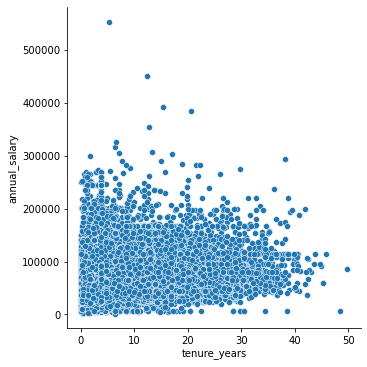

In [26]:
sns.relplot(x='tenure_years', y='annual_salary', data=train)

In [27]:
df['is_elected'] = np.where((df.title == 'ELECTED OFFICIAL') | 
                            (df.title == 'JUSTICE') |
                            (df.title == 'ATTORNEY GENERAL') |
                            (df.title == 'GOVERNOR') | 
                            (df.title == 'LIEUTENANT GOVERNOR') |
                            (df.title == 'COMPTROLLER OF PUBLIC ACCOUNTS') |
                            (df.title.str.startswith('COMMISSIONER'))
                            , 1, 0)

In [28]:
df.is_elected.value_counts()

0    144456
1       274
Name: is_elected, dtype: int64

In [35]:
df[df.is_elected == 1]

,agency_id,agency,lastname,firstname,title,race,sex,emptype,hire_date,hours_worked,...,annual_salary,race_encoded,is_female,is_white,is_hispanic,is_black,is_BIPOC,tenure_months,tenure_years,is_elected
89,101,SENATE,ALVARADO,CAROL,ELECTED OFFICIAL,HISPANIC,FEMALE,URF - UNCLASSIFIED REGULAR FULL-TIME,2018-12-21,40.0,...,7200.00,3,1,0,1,0,1,30,2.5,1
117,101,SENATE,BETTENCOURT,PAUL,ELECTED OFFICIAL,WHITE,MALE,URF - UNCLASSIFIED REGULAR FULL-TIME,2015-01-13,40.0,...,7200.00,5,0,1,0,0,0,78,6.5,1
121,101,SENATE,BIRDWELL,BRIAN,ELECTED OFFICIAL,WHITE,MALE,URF - UNCLASSIFIED REGULAR FULL-TIME,2010-07-02,40.0,...,7200.00,5,0,1,0,0,0,132,11.0,1
122,101,SENATE,BLANCO,CESAR,ELECTED OFFICIAL,HISPANIC,MALE,URF - UNCLASSIFIED REGULAR FULL-TIME,2021-01-12,40.0,...,7200.00,3,0,0,1,0,1,6,0.5,1
144,101,SENATE,BUCKINGHAM,DAWN,ELECTED OFFICIAL,WHITE,FEMALE,URF - UNCLASSIFIED REGULAR FULL-TIME,2017-01-10,40.0,...,7200.00,5,1,1,0,0,0,54,4.5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142416,312,SECURITIES BOARD,ILES,TRAVIS,"COMMISSIONER, SSB",WHITE,MALE,ERF - EXEMPT REGULAR FULL-TIME,2001-10-29,40.0,...,162490.92,5,0,1,0,0,0,236,19.7,1
142943,450,SAVINGS AND LOAN DEPARTMENT,JONES,CAROLINE,COMMISSIONER,WHITE,FEMALE,ERF - EXEMPT REGULAR FULL-TIME,2008-03-01,40.0,...,194749.92,5,1,1,0,0,0,160,13.3,1
143007,451,DEPARTMENT OF BANKING,COOPER,CHARLES,COMMISSIONER,WHITE,MALE,ERF - EXEMPT REGULAR FULL-TIME,2008-12-01,40.0,...,242925.00,5,0,1,0,0,0,151,12.6,1
143231,466,CONSUMER CREDIT COMMISSION,PETTIJOHN,LESLIE,COMMISSIONER,WHITE,FEMALE,ERF - EXEMPT REGULAR FULL-TIME,1987-07-20,40.0,...,195999.96,5,1,1,0,0,0,407,33.9,1


In [29]:
{'GOVERNOR': 4122}

{'GOVERNOR': 4122}

In [30]:
df[df.lastname == 'PAXTON']

,agency_id,agency,lastname,firstname,title,race,sex,emptype,hire_date,hours_worked,...,annual_salary,race_encoded,is_female,is_white,is_hispanic,is_black,is_BIPOC,tenure_months,tenure_years,is_elected
471,101,SENATE,PAXTON,ANGELA,ELECTED OFFICIAL,WHITE,FEMALE,URF - UNCLASSIFIED REGULAR FULL-TIME,2019-01-08,40.0,...,7200.00,5,1,1,0,0,0,30,2.5,1
1240,102,HOUSE OF REPRESENTATIVES,PAXTON,CHRISTOPHER,ELECTED OFFICIALS STAFF,WHITE,MALE,URF - UNCLASSIFIED REGULAR FULL-TIME,2019-01-08,40.0,...,34350.24,5,0,1,0,0,0,30,2.5,0
26673,405,DEPARTMENT OF PUBLIC SAFETY,PAXTON,LAURA,LICENSE AND PERMIT SPEC III,WHITE,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME,2017-07-15,40.0,...,43040.64,5,1,1,0,0,0,48,4.0,0
57958,529,HEALTH AND HUMAN SERVICES COMMISSION,PAXTON,MARIA,REHABILITATION TEACHER II,HISPANIC,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME,2020-06-15,40.0,...,40138.92,3,1,0,1,0,1,13,1.1,0


In [31]:
"Commissioner of General Land Office".upper()

'COMMISSIONER OF GENERAL LAND OFFICE'

In [32]:
df[df.title == 'COMMISSIONER OF GENERAL LAND OFFICE']

,agency_id,agency,lastname,firstname,title,race,sex,emptype,hire_date,hours_worked,...,annual_salary,race_encoded,is_female,is_white,is_hispanic,is_black,is_BIPOC,tenure_months,tenure_years,is_elected


In [33]:
# sns.barplot(data=train, x='race')

In [34]:
train.race_encoded

125096    2
42845     1
117530    2
26227     5
113713    3
         ..
94314     3
17860     2
136510    5
141549    5
89798     3
Name: race_encoded, Length: 81048, dtype: int64